In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#load iris dataset from sklearn
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
# Create a Datafram with the features and targets
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df['target']=iris.target

In [ ]:
# Display the first few rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# 2. Data Exploration and Cleaning

In [ ]:
# Checks the structure and summary of the DataFrame
# Displays columns, non-null counts, and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
# Checks for missing/null values in each column
# Return a count of missing values per columns
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [ ]:
# Generate descriptive statistics for numerical features
#transpose() Flips rows and coulmns to make the output easier to read
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [ ]:
#Checks for duplicate rows in the dataset
# Return the number of completely duplicated rows
df.duplicated().sum()

np.int64(1)

In [ ]:
# Check the data types of column
# Helps indentify if any columns need conversion(e.g Strings to datetime or category )
df.dtypes


,0
sepal length (cm),float64
sepal width (cm),float64
petal length (cm),float64
petal width (cm),float64
target,int64


In [ ]:
 # Exploartatory Data Analysis (EDA)

In [ ]:
# Count the number of samples in each target class(0,1,2)
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
# Import seaborn and matplotlib for visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
 # Map numerical target labels to flowe species names for easier interpretation in plots
 df['species']=df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})

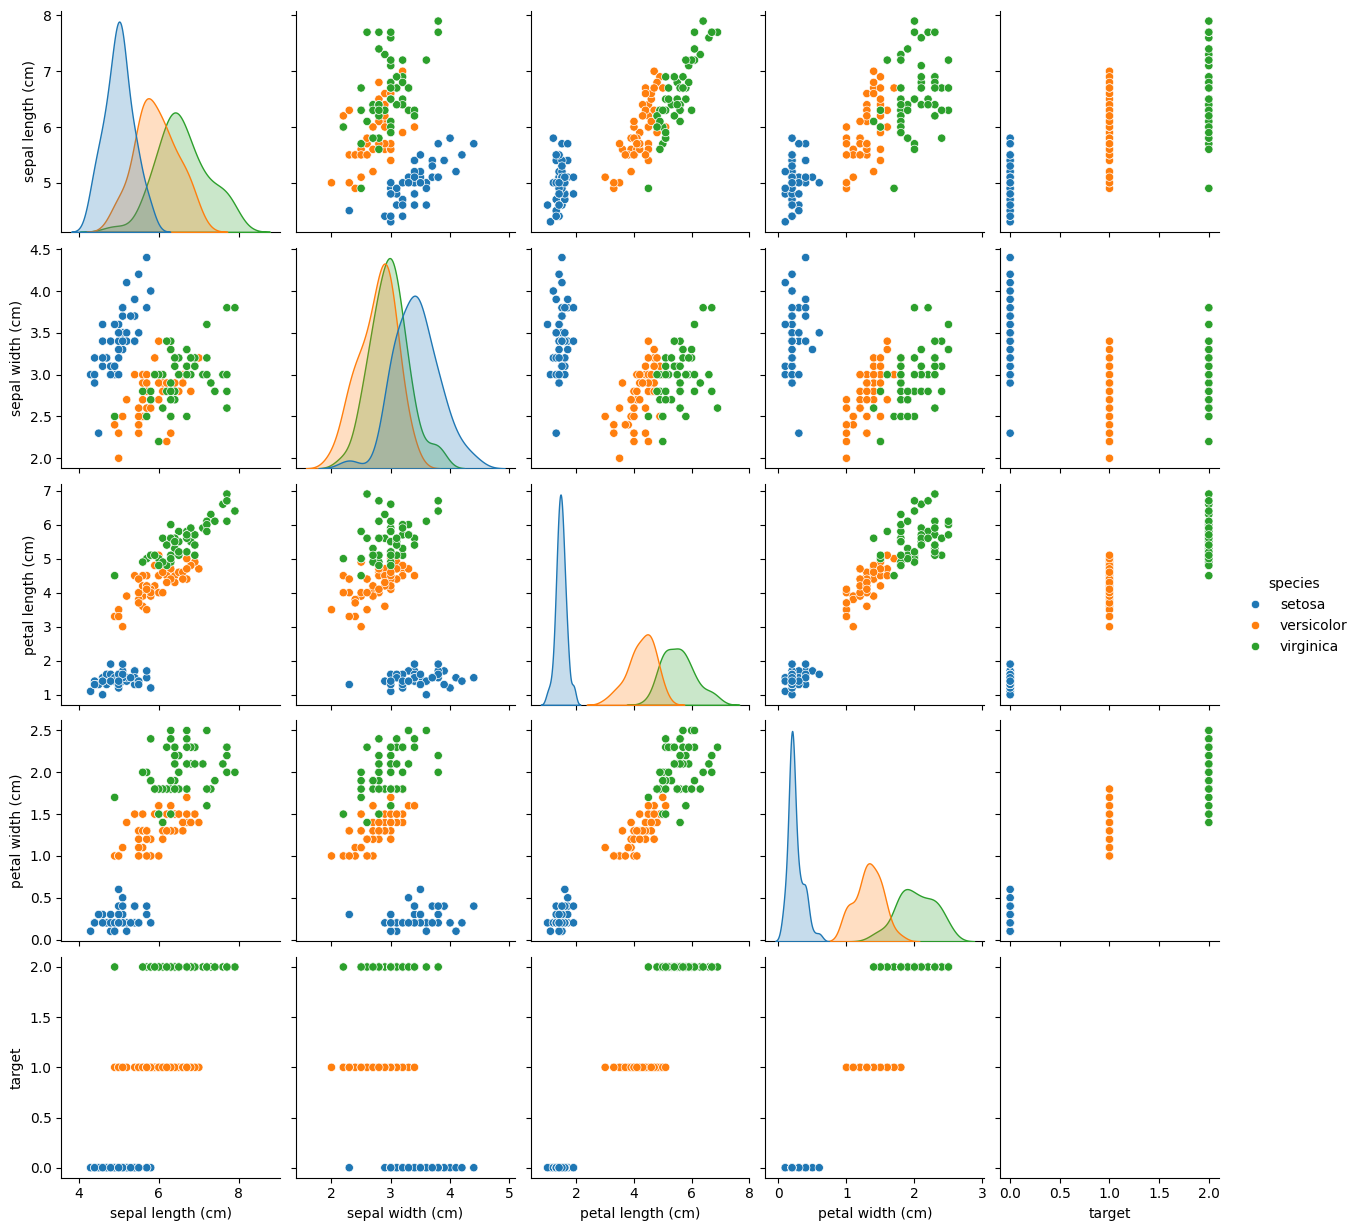

In [ ]:
# Create a pairplot to visualize the relationship between all pairs of features, colored by species
sns.pairplot(df,hue='species')
plt.show()

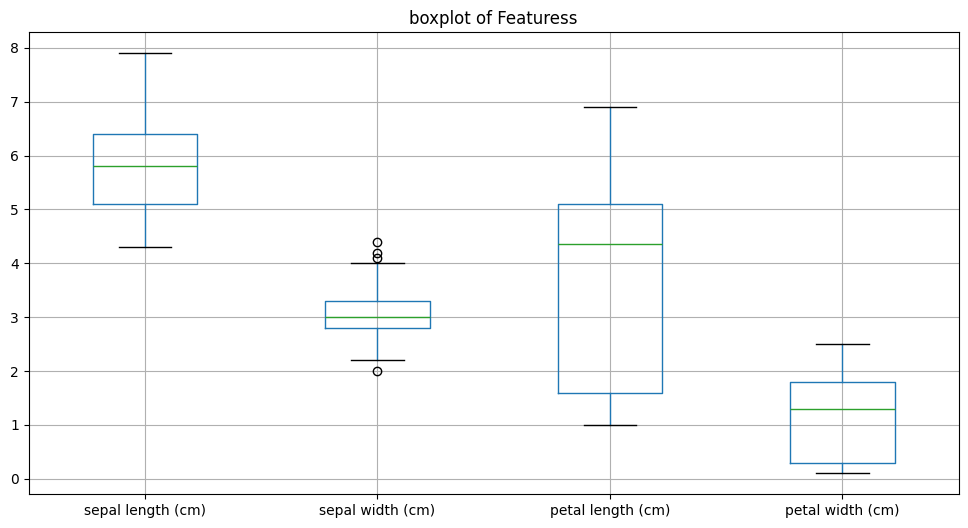

In [ ]:
# Create a boxplot to visualize the spred(distribution, outlier,etc) of each feature
plt.figure(figsize=(12,6))
df.drop(columns=['target']).boxplot()
plt.title("boxplot of Featuress")
plt.show()


<Figure size 1000x800 with 0 Axes>

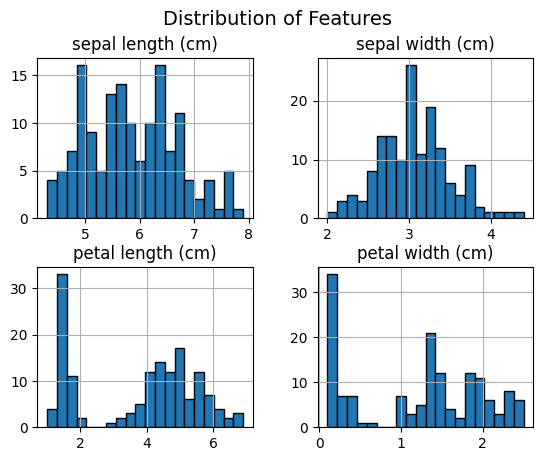

In [ ]:
# plot histograms to see the distribution of values for each feature
plt.figure(figsize=(10,8))
df.drop(columns=['target']).hist(bins=20,edgecolor='black')
plt.suptitle("Distribution of Features",fontsize=14)
plt.show()

In [ ]:
# Create a violin plot to show distribution and probability adensity of features by target class
# First, we need to melt the DataFrame into long format for seaborn

# Melt the DataFrame, excluding the 'species' column
df_melted = df.drop(columns=['species']).melt(id_vars=['target'], var_name='Features', value_name='Value')

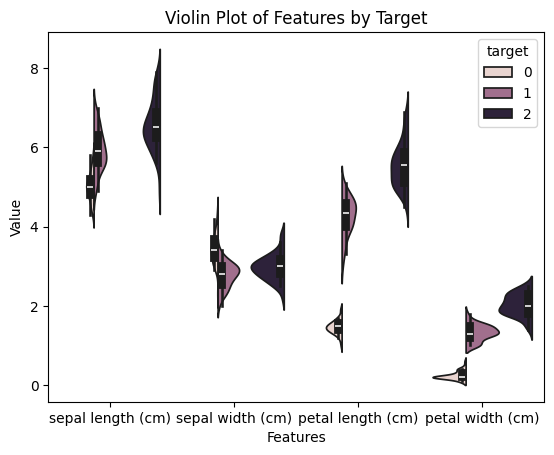

In [ ]:
# Plot the violin plot for each feature grouped by target
sns.violinplot(x="Features", y="Value", hue="target", data=df_melted, split=True)
plt.title("Violin Plot of Features by Target")
plt.show()

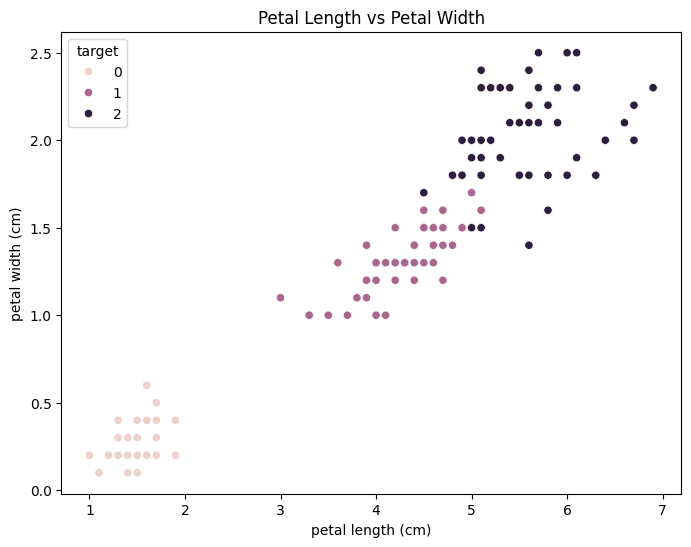

In [ ]:
# Scatter plot for petal length vs. petal width colored by target class
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df["target"])
plt.title("Petal Length vs Petal Width")
plt.show()

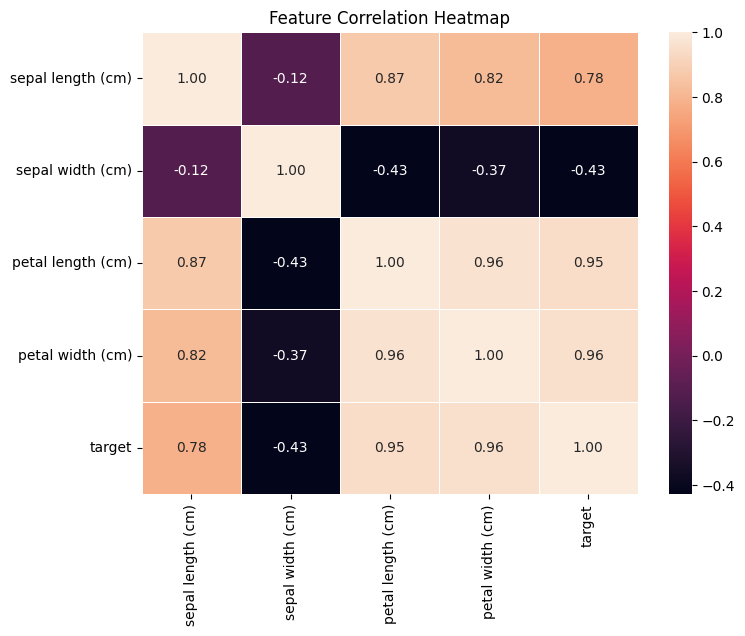

In [ ]:
#  Heatmap showing correlation between all features and target
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
#Splitting the Data:

In [ ]:
# We split data into training (80%) and testing (20%) sets.
#  Splitting the dataset into features and target

# X will contain all the input features (everything except the target column)
X = df.drop(columns=['target'])  # Features

# y will contain the output/label we're trying to predict (target column)
y = df['target']  # Target (class labels: 0, 1, 2 for flower species)

#  Splitting the dataset into training and testing sets
# 80% of the data will be used for training the model (X_train, y_train)
# 20% will be used to evaluate/test the model (X_test, y_test)
# random_state=42 ensures reproducibility of the split (same result every time)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature Scalling

In [ ]:
#We standardize the dataset for better performance.
# Standardizing the features
from sklearn.preprocessing import StandardScaler
# Step 1: Create a StandardScaler object
scaler = StandardScaler()

# Remove the 'species' column from X_train and X_test
X_train_scaled = X_train.drop(columns=['species'])
X_test_scaled = X_test.drop(columns=['species'])

# Step 2: Fit the scaler on the training data and transform it
# This calculates the mean and standard deviation from the training set,
# then applies standardization: (x - mean) / std
X_train_scaled = scaler.fit_transform(X_train_scaled)

# Step 3: Use the same scaler (with training data stats) to transform the test set
# This ensures that the test data is scaled in the same way as the training data
X_test_scaled = scaler.transform(X_test_scaled)

In [ ]:
#  Model Training & Evaluation

In [ ]:
#We train three models and evaluate their performance.
# 1. Logistic Regression:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()

In [ ]:
# Train the model using scaled training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predict the labels for test set
y_pred_log = log_reg.predict(X_test_scaled)

In [ ]:
#Evaluate the model's performance
accuracy_log_reg = accuracy_score(y_test, y_pred_log)  # Accuracy Score
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log)  # Confusion Matrix
class_report_log_reg = classification_report(y_test, y_pred_log)  # Classification Report

In [ ]:
# Print evaluation metrics
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print("Confusion Matrix:")
print(conf_matrix_log_reg)
print("Classification Report:")
print(class_report_log_reg)

Logistic Regression Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Decision Tree Classifier:


In [ ]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
#Initialize the Decision Tree model
tree_clf = DecisionTreeClassifier()
# Train the model
tree_clf.fit(X_train.drop(columns=['species']), y_train)
# Predict labels for test set
y_pred_tree = tree_clf.predict(X_test.drop(columns=['species']))
# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Print evaluation metrics for Decision Tree
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print("Confusion Matrix:")
print(conf_matrix_tree)
print("Classification Report:")
print(class_report_tree)

Decision Tree Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#k-Nearest Neighbors (k-NN):
# Import k-NN Classifier
from sklearn.neighbors import KNeighborsClassifier
# Initialize k-NN model with 5 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_clf.fit(X_train_scaled, y_train)
# Predict labels for test set
y_pred_knn = knn_clf.predict(X_test_scaled)
# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)
# Print evaluation metrics
print(f'k-NN Accuracy: {accuracy_knn:.2f}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(class_report_knn)

k-NN Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



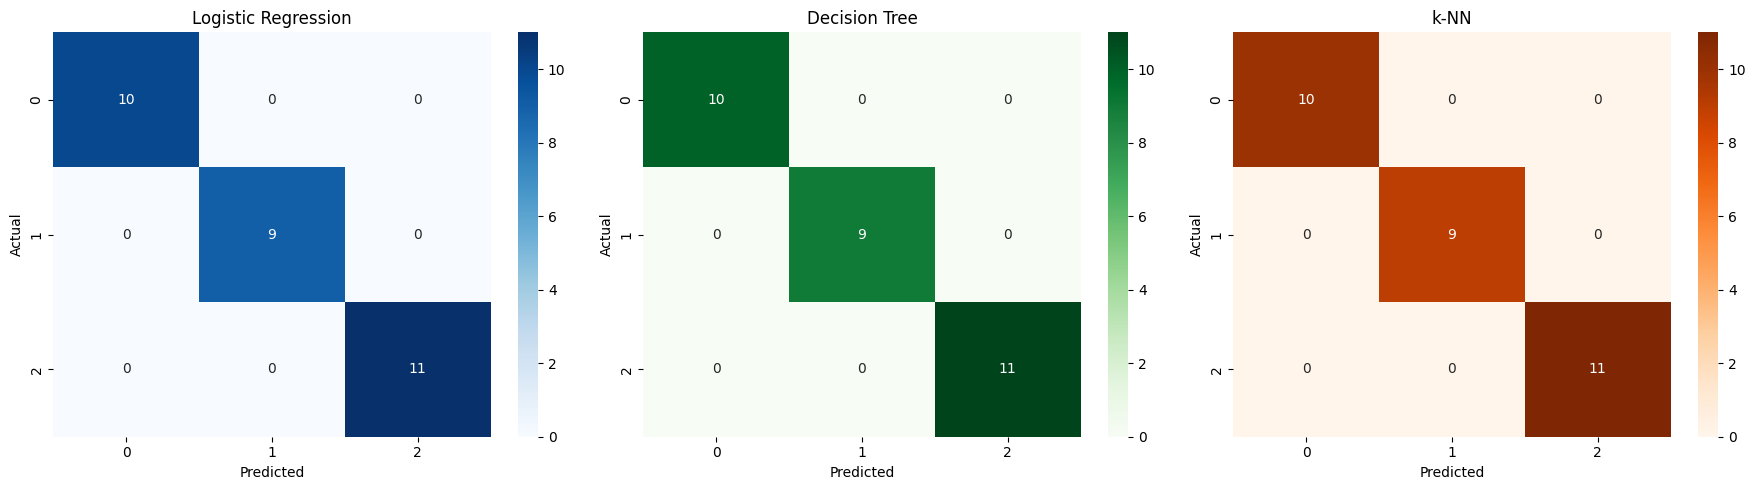

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a subplot with 1 row and 3 columns for visualizing 3 confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Plot confusion matrix for Logistic Regression
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
# Plot confusion matrix for Decision Tree
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
# Plot confusion matrix for k-Nearest Neighbors
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('k-NN')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')
# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import pickle
# Saving the trained Logistic Regression model to a file using pickle
# 'wb' mode = write binary mode, used to save the model object
with open('log_reg_model.pkl', 'wb') as model_file:
# Serializes and writes the logistic regression model to a file
  pickle.dump(log_reg, model_file)
# Saving the StandardScaler object to a file using pickle
with open('scaler.pkl', 'wb') as scaler_file:
# Serializes and writes the scaler object to the file
  pickle.dump(scaler, scaler_file)

In [ ]:
# Import necessary libraries
import pickle
import pandas as pd

# ---------------------------
# Load the trained model and scaler
# ---------------------------
def load_model_and_scaler(model_filename='log_reg_model.pkl',
                          scaler_filename='scaler.pkl'):
  """Loads the trained model and scaler from pickle files."""
  # Load the trained model from file
  with open(r"/content/log_reg_model.pkl", 'rb') as model_file:
    model = pickle.load(model_file)  # Deserialize model
  # Load the StandardScaler used during training
  with open(r"/content/scaler.pkl", 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)  # Deserialize scaler
  return model, scaler

# ---------------------------
# Preprocess input using the loaded scaler
# ---------------------------
def preprocess_input(input_data, scaler):
  """Preprocess the input data: convert to DataFrame and scale it using the loaded scaler."""
  # Convert the input dictionary to a single-row DataFrame
  input_df = pd.DataFrame([input_data])
  # Apply the same scaling used during training
  input_scaled = scaler.transform(input_df)
  return input_scaled

# ---------------------------
# Predict the Iris species
# ---------------------------
def predict_iris_species(input_data):
  """Predicts the species of the Iris flower (Setosa, Versicolor, or Virginica)."""
  # Load the trained model and scaler
  model, scaler = load_model_and_scaler()
  # Preprocess input (apply scaling)
  input_scaled = preprocess_input(input_data, scaler)
  # Predict the species (returns 0, 1, or 2)
  prediction = model.predict(input_scaled)
  # Map numerical prediction to actual species name
  species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
  predicted_species = species_map[prediction[0]]
  return predicted_species

# ---------------------------
# Example Usage
# ---------------------------
# New input sample to classify
new_iris_data = {
  'sepal length (cm)': 5.1,
  'sepal width (cm)': 3.5,
  'petal length (cm)': 1.4,
  'petal width (cm)': 0.2
}

# Call the prediction function
result = predict_iris_species(new_iris_data)
print(f"The predicted species is: {result}")

The predicted species is: setosa
